In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import utils
from darts import TimeSeries
import numpy as np
import pandas as pd
from darts.utils import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from darts.metrics import rmse, mape, r2_score

In [7]:
df = utils.load_data()
ts, covars_diff, covars_nodiff = utils.df2ts(df)

# Plot raw values

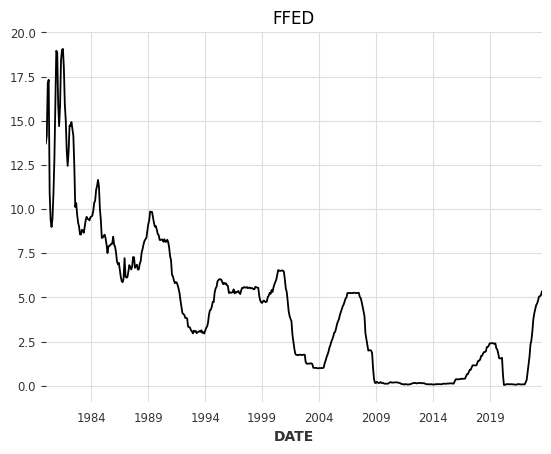

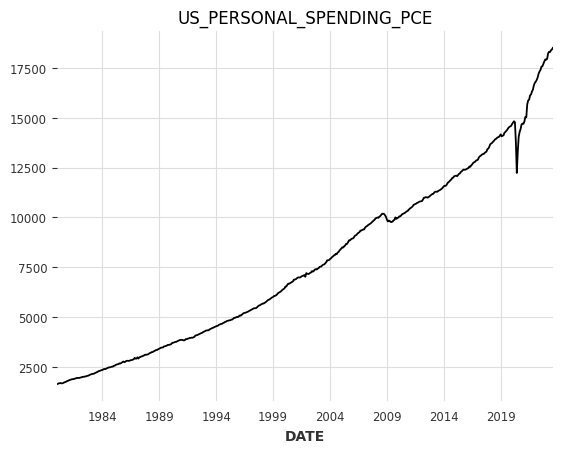

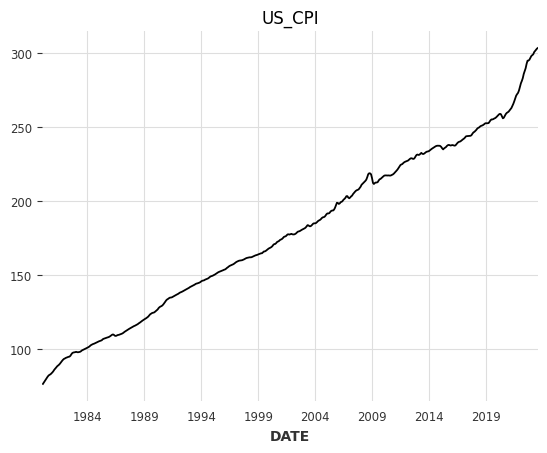

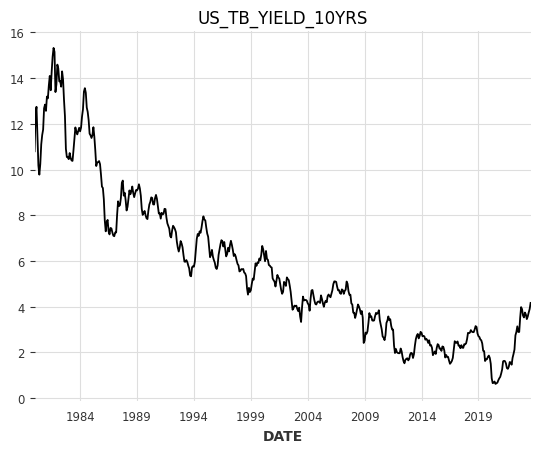

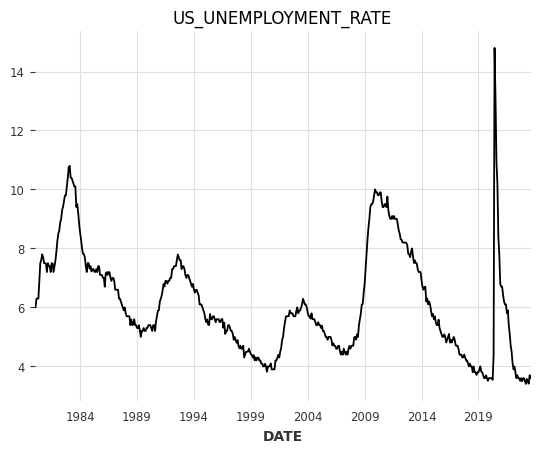

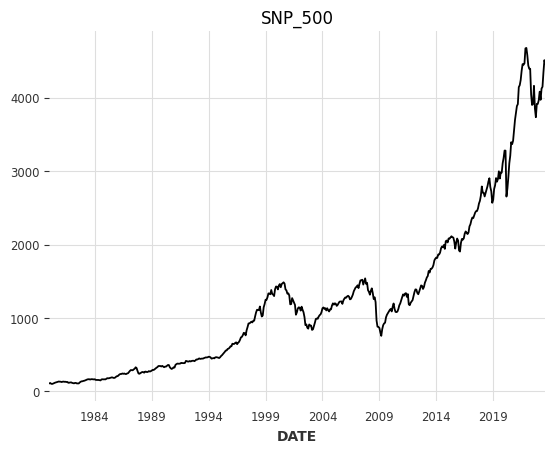

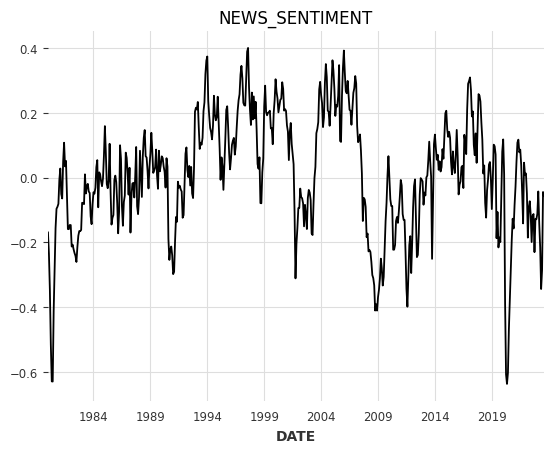

In [8]:
for col in df.columns:
    df[col].plot(title=col)
    plt.show()

# Correlation

In [20]:
covars_diff_pipeline, covars_diff_scaled = utils.scale_ts(covars_diff, should_diff=True)
covars_nodiff_pipeline, covars_nodiff_scaled = utils.scale_ts(
    covars_nodiff, should_diff=False
)
pipeline, ts_scaled = utils.scale_ts(ts, should_diff=True)

train_ts_scaled, val_ts_scaled = ts_scaled.split_after(pd.Timestamp("2016-01-01"))
train_ts, val_ts = ts.split_after(pd.Timestamp("2016-01-01"))

covariates_scaled = covars_diff_scaled.stack(covars_nodiff_scaled)
train_covariates_scaled, val_covariates_scaled = covariates_scaled.split_after(
    pd.Timestamp("2016-01-01")
)

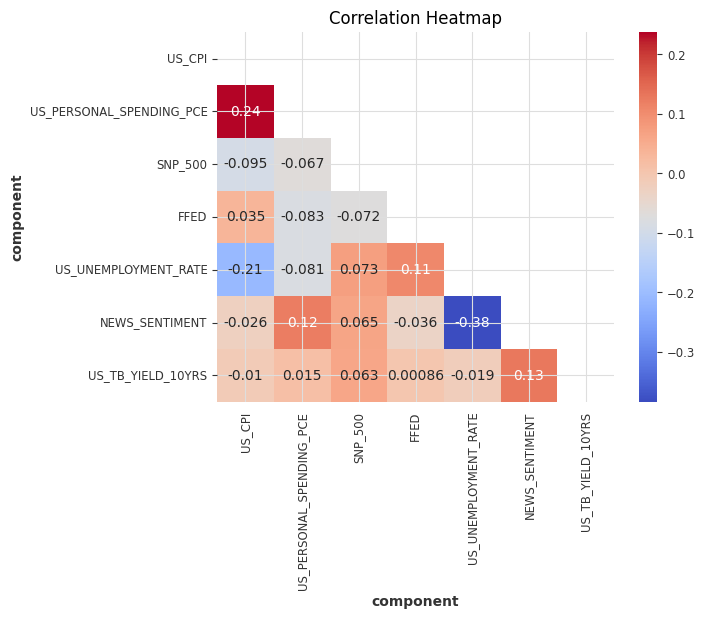

In [21]:
covariates_scaled = covariates_scaled.stack(ts_scaled)
df = covariates_scaled.pd_dataframe()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot the heatmap with the mask
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

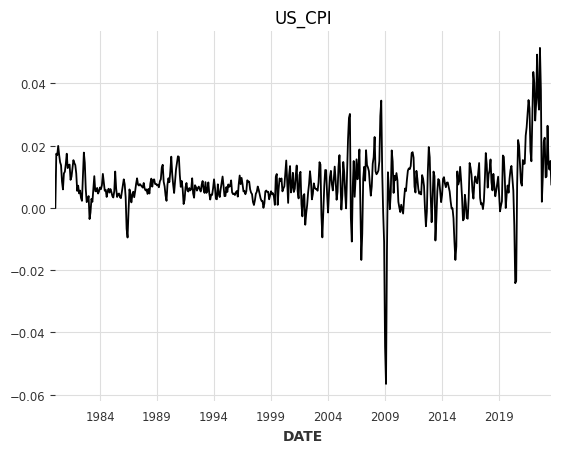

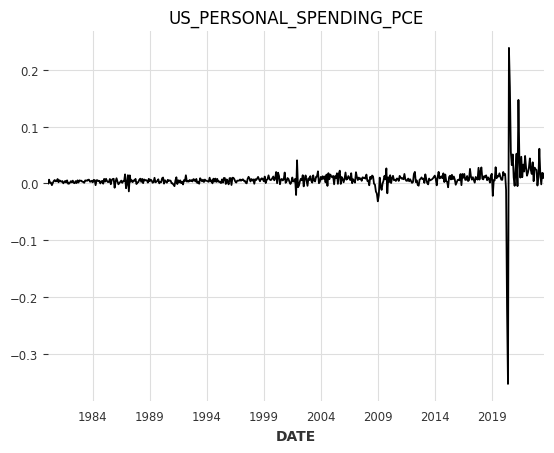

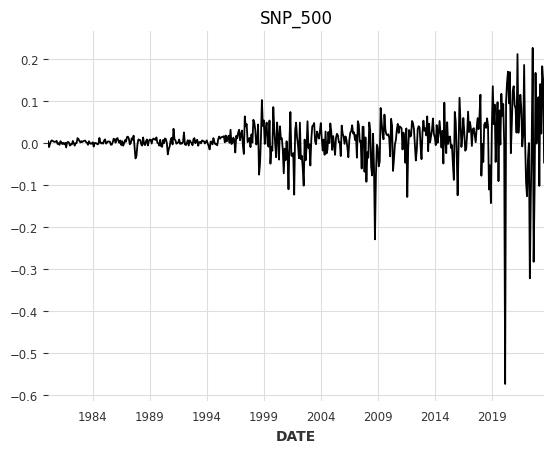

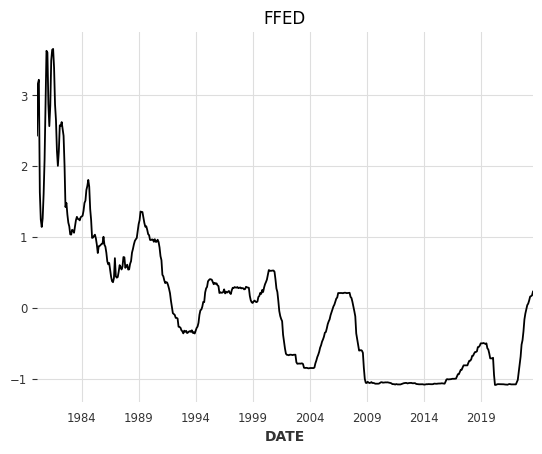

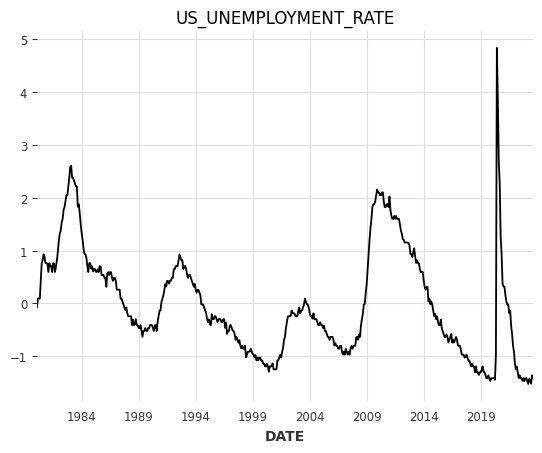

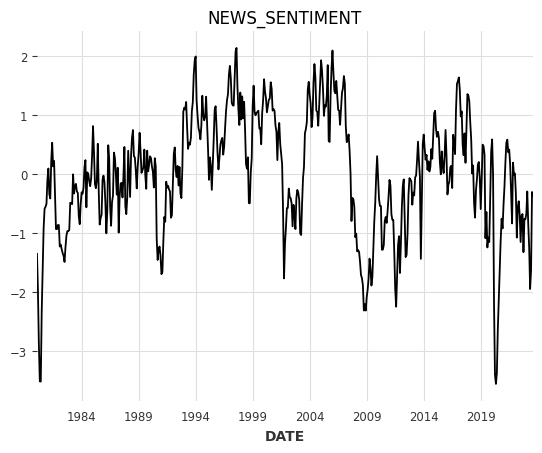

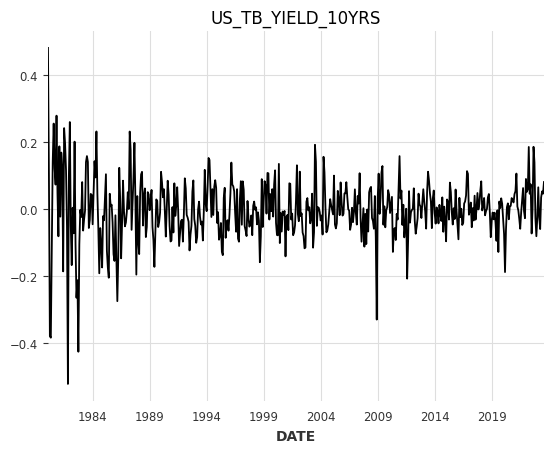

In [112]:
for col in df.columns:
    df[col].plot(title=col)
    plt.show()

# Granger Causality

<Axes: xlabel='DATE'>

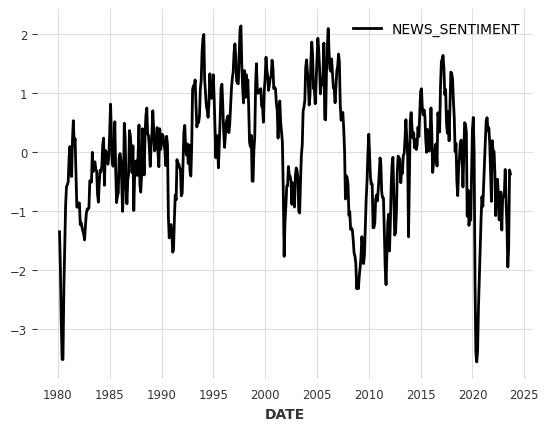

In [113]:
sent = TimeSeries.from_dataframe(df,value_cols= ['NEWS_SENTIMENT'])
sent.plot()

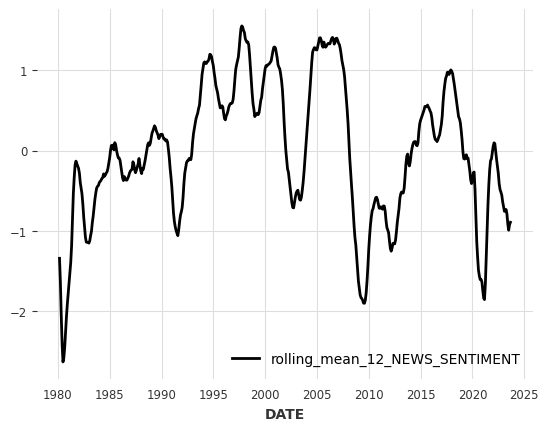

In [166]:
smoothed = utils.moving_average(sent, window_size=12)
smoothed.plot()
plt.show()

In [165]:
ts_cause = smoothed

results = statistics.granger_causality_tests(ts_cause, ts_scaled, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1107  , p=0.7395  , df_denom=519, df_num=1
ssr based chi2 test:   chi2=0.1113  , p=0.7386  , df=1
likelihood ratio test: chi2=0.1113  , p=0.7387  , df=1
parameter F test:         F=0.1107  , p=0.7395  , df_denom=519, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.8393  , p=0.0002  , df_denom=516, df_num=2
ssr based chi2 test:   chi2=17.8498 , p=0.0001  , df=2
likelihood ratio test: chi2=17.5509 , p=0.0002  , df=2
parameter F test:         F=8.8393  , p=0.0002  , df_denom=516, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7419  , p=0.0028  , df_denom=513, df_num=3
ssr based chi2 test:   chi2=14.4199 , p=0.0024  , df=3
likelihood ratio test: chi2=14.2236 , p=0.0026  , df=3
parameter F test:         F=4.7419  , p=0.0028  , df_denom=513, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5321  , p=0.0074  

/Users/Xavier/cdpq-ia/venv/lib/python3.11/site-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)
/Users/Xavier/cdpq-ia/venv/lib/python3.11/site-packages/darts/utils/statistics.py:462: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  return kpss(ts.values(copy=False), regression, nlags)


In [ ]:
utils.load_data_dict()

,FEATURE_NAME,FEATURE_CATEGORY,FEATURE_DESCRIPTION
0,US_CPI,INFLATION,"Consumer Price Index for the United States, me..."
1,US_CPI_EXCL_FOOD_N_ENERGY,INFLATION,Consumer Price Index for the United States exc...
2,US_PERSONAL_SPENDING_PCE,INFLATION,"Personal Consumption Expenditures Price Index,..."
3,CANADA_CPI,INFLATION,"Consumer Price Index for Canada, measuring the..."
4,CANADA_CPI_EXCL_FOOD_N_ENERGY,INFLATION,Consumer Price Index for Canada excluding food...
5,US_CAPACITY_UTILIZATION,GDP_ECONOMIC_GROWTH,Percentage of resources used by corporations a...
6,US_M2,GDP_ECONOMIC_GROWTH,Measure of the money supply that includes cash...
7,US_CONSUMER_CREDIT,GDP_ECONOMIC_GROWTH,Total amount of credit extended to individuals...
8,US_INDUSTRIAL_PRODUCTION,GDP_ECONOMIC_GROWTH,Measure of the output of the industrial sector...
9,US_NFP_ESTABLISHMENT_DATA,GDP_ECONOMIC_GROWTH,"Nonfarm Payrolls data, representing the total ..."


In [104]:
us_variables = pd.read_csv("data/excel_jorge/Variables_US.csv", parse_dates=["DATE"]).set_index("DATE")
us_variables = us_variables.asfreq(freq="ME", method="ffill")
df_s =  df_s[["MEDCPIM158SFRBCLE"]].copy()  

# Transformer les valeurs "Nan" en NaN (valeurs reconnues par pandas)
df_s = df_s.replace("Nan", pd.NA)

# Supprimer les lignes contenant des valeurs NaN
df_s = df_s.dropna()


df_s

,MEDCPIM158SFRBCLE
DATE,
1984-11-30,4.296144
1984-12-31,4.282641
1985-01-31,4.257919
1985-02-28,4.242164
1985-03-31,4.229744
...,...
2024-06-30,4.945526
2024-07-31,4.802868
2024-08-31,4.677644


In [105]:
df_s = df_s.rolling(window=12).mean()
ts_us_variables = TimeSeries.from_dataframe(df_s, value_cols= ['MEDCPIM158SFRBCLE'])

results = statistics.granger_causality_tests(ts_us_variables , ts_scaled, maxlag=12)

ts_cause and ts_effect time series have different time index. We will slice-intersect ts_cause with ts_effect.


MissingDataError: exog contains inf or nans